In [1]:
import csns_read_nightly as cra
import data_ana
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tof
import target_model as tm
%matplotlib inline

In [2]:
store = pd.HDFStore( r'D:\root\single_pulse.h5')

In [3]:
store.keys()

['/data', '/data_ana', '/data_coin', '/data_correct', '/data_t0']

# 重做反冲质子靶分析

In [10]:
run_numb_list = store.select('data','run_numb = 11704',columns=['run_numb','file_numb'])

In [12]:
run_numb_list['file_numb'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156], dtype=int64)

In [13]:
run_numb_list = store.select('data','run_numb = 11709',columns=['run_numb','file_numb'])
run_numb_list['file_numb'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158], dtype=int64)

### 分析t0_index

In [14]:
%%time
for i in range(156):
    cra.t0_index_save(i+1,store,key='data_t0_new',run_numb = 11704,datafile_path = r'F:\database\\')

Wall time: 8min 23s


In [15]:
%%time
for i in range(158):
    cra.t0_index_save(i+1,store,key='data_t0_new',run_numb = 11709,datafile_path = r'F:\database\\')

Wall time: 9min 5s


In [48]:
data = store.select('data_t0_new','run_numb = 11709')

In [49]:
len(data)

3817786

In [20]:
data['tcm_time_s'].unique()[0],data['tcm_time_s'].unique()[-1]

(1540773065, 1540858972)

In [23]:
cra.utc_time(1540773065),cra.utc_time(1540858972)

('2018-10-29 08:31:05', '2018-10-30 08:22:52')

In [24]:
data = store.select('data_t0_new','run_numb = 11709')
data['tcm_time_s'].unique()[0],data['tcm_time_s'].unique()[-1]

(1540869092, 1541027095)

In [25]:
cra.utc_time(1540869092),cra.utc_time(1541027095)

('2018-10-30 11:11:32', '2018-11-01 07:04:55')

In [26]:
store_proton = pd.HDFStore(r'D:\root\hdf\proton_flux.h5')

In [38]:
def neutron_pulse_flux_from_acc(en_section,utc_numb):
    # 返回某一时间段内，某一能量切片的flux /cm2/s
    store_proton = pd.HDFStore(r'D:\root\hdf\proton_flux.h5')
    data_proton = store_proton.select('data','utc_time > %i & utc_time < %i' %(utc_numb[0]-1,utc_numb[1]+1))
    group_proton = data_proton.groupby('utc_time')['unknown'].mean().copy()
    store_proton.close()
    flux1 = group_proton.mean()   # 每pulse平均质子打靶数
    flux2 = flux1*25*0.413        # 折算到每中子注量 /cm2/s
    flux3 = data_ana.neutron_flux_pulse(en_section)  #按照10KW下2.2e6的flux2计算能区注量  /cm2/pulse
    rate = flux2/2.2e6            # 实际注量/理论注量
    return flux3*rate             # 10KW的实际每pulse注量  /cm2/pulse

In [41]:
utc_numb = (1540773065, 1540858972)
en_section = [10,12]
flux_acc = neutron_pulse_flux_from_acc(en_section,utc_numb)
flux_acc,data_ana.neutron_flux_pulse(en_section)

(2222.3935884581829, 2875.0764705882352)

In [42]:
utc_numb = (1540869092, 1541027095)
en_section = [10,12]
flux_acc = neutron_pulse_flux_from_acc(en_section,utc_numb)
flux_acc,data_ana.neutron_flux_pulse(en_section)

(2146.1486374361025, 2875.0764705882352)

In [43]:
2875.0764705882352/2146.1486374361025

1.3396446175428682

In [57]:
# 11704 + 11705的整体平均
(2222.3935884581829*n_pulse_11704 + 2146.1486374361025*n_pulse_11709)/(n_pulse_11704+n_pulse_11709)

2172.692405448047

In [58]:
2172.692405448047/2875.0764705882352

0.755698997113464

## 单束团期间，11704和11709文件的flux修正因子0.7557

In [59]:
reload(data_ana)

<module 'data_ana' from 'D:\mypython\data_ana.py'>

In [62]:
utc_time_11704 = (1540773065, 1540858972)
n_pulse_11704 = 2038954
utc_time_11709 = (1540869092, 1541027095)
n_pulse_11709 = 3817786
n_pulse_all = 2038954 + 3817786

In [65]:
df = pd.DataFrame()

(4682.0422792702984, 3102, 1.3126051724469848e-19)


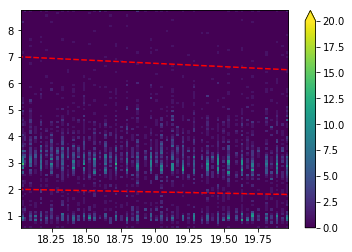

In [72]:
a = data_ana.Slice([18,20],store,key = 'data_correct')
a.slice([7,6.5],[2,1.8])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(6299.6516857155593, 3829, 1.3851151855636344e-19)


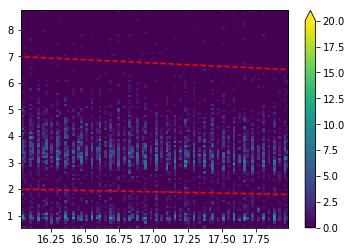

In [75]:
a = data_ana.Slice([16,18],store,key = 'data_correct')
a.slice([7,6.5],[2,1.8])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(4030.6918489766877, 3340, 1.3923672612460744e-19)


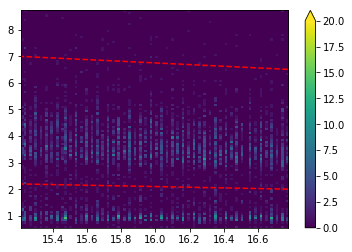

In [83]:
a = data_ana.Slice([15.2,16.8],store,key = 'data_correct')
a.slice([7,6.5],[2.2,2])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(4416.002697085908, 3852, 1.5560285716988267e-19)


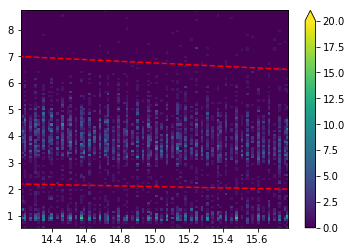

In [86]:
a = data_ana.Slice([14.2,15.8],store,key = 'data_correct')
a.slice([7,6.5],[2.2,2])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(5693.5915797032731, 4607, 1.7092099849156975e-19)


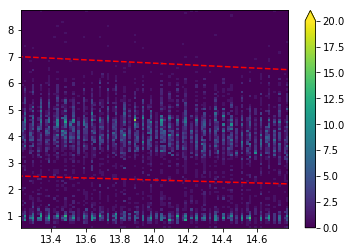

In [90]:
a = data_ana.Slice([13.2,14.8],store,key = 'data_correct')
a.slice([7,6.5],[2.5,2.2])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(7124.5986021759318, 3425, 1.8776058769096833e-19)


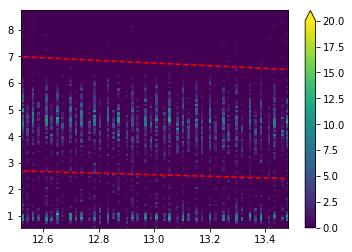

In [94]:
a = data_ana.Slice([12.5,13.5],store,key = 'data_correct')
a.slice([7,6.5],[2.7,2.4])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(8404.7428243691757, 4018, 1.9837348399819477e-19)


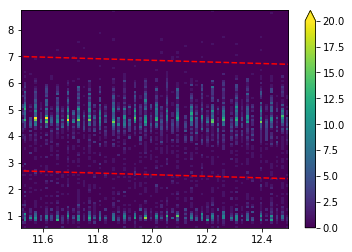

In [97]:
a = data_ana.Slice([11.5,12.5],store,key = 'data_correct')
a.slice([7,6.7],[2.7,2.4])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 3193, 2.2073711670058878e-19)


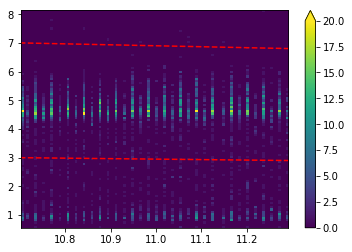

In [107]:
a = data_ana.Slice([10.7,11.3],store,key = 'data_correct')
a.slice([7,6.8],[3,2.9])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 2871, 2.0870594675024372e-19)


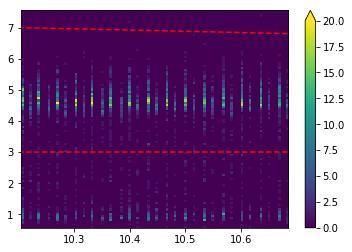

In [110]:
a = data_ana.Slice([10.2,10.7],store,key = 'data_correct')
a.slice([7,6.8],[3,3])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 3778, 2.1263213882320992e-19)


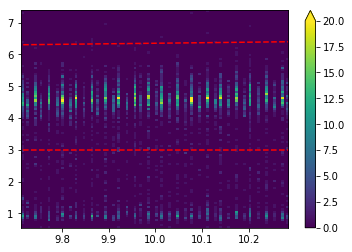

In [114]:
a = data_ana.Slice([9.7,10.3],store,key = 'data_correct')
a.slice([6.3,6.4],[3,3])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 2941, 2.1309832824433076e-19)


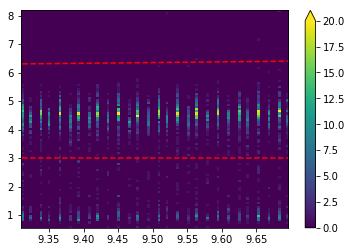

In [116]:
a = data_ana.Slice([9.3,9.7],store,key = 'data_correct')
a.slice([6.3,6.4],[3,3])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 4183, 2.1934835711852219e-19)


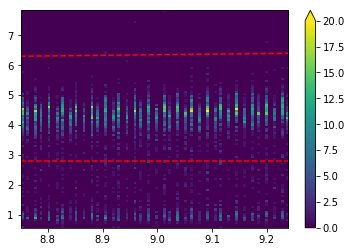

In [119]:
a = data_ana.Slice([8.75,9.25],store,key = 'data_correct')
a.slice([6.3,6.4],[2.8,2.8])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 4772, 2.0747563969724659e-19)


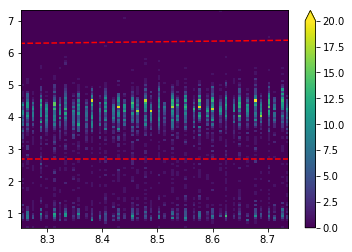

In [122]:
a = data_ana.Slice([8.25,8.75],store,key = 'data_correct')
a.slice([6.3,6.4],[2.7,2.7])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 4448, 2.0454469553578445e-19)


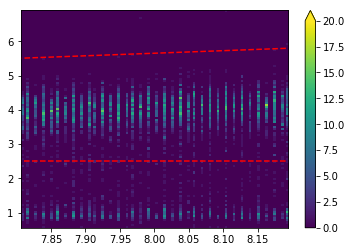

In [126]:
a = data_ana.Slice([7.8,8.2],store,key = 'data_correct')
a.slice([5.5,5.8],[2.5,2.5])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 5153, 2.0433952678293728e-19)


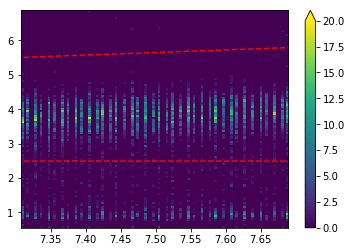

In [131]:
a = data_ana.Slice([7.3,7.7],store,key = 'data_correct')
a.slice([5.5,5.8],[2.5,2.5])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(8317.1725641170233, 6115, 2.0746497035835542e-19)


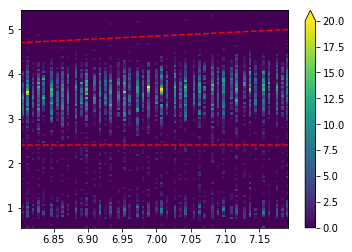

In [134]:
a = data_ana.Slice([6.8,7.2],store,key = 'data_correct')
a.slice([4.7,5],[2.4,2.4])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(9619.3642118438984, 3696, 2.0387778902439731e-19)


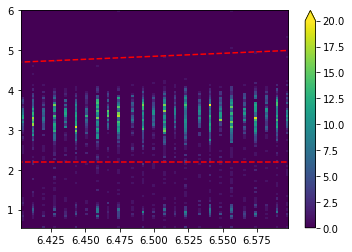

In [137]:
a = data_ana.Slice([6.4,6.6],store,key = 'data_correct')
a.slice([4.7,5],[2.2,2.2])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 4430, 2.0503183421717388e-19)


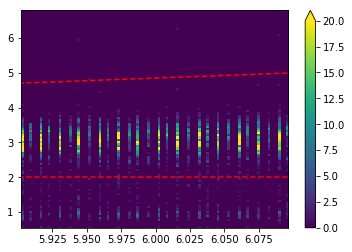

In [139]:
a = data_ana.Slice([5.9,6.1],store,key = 'data_correct')
a.slice([4.7,5],[2.0,2.0])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(13677.618251808661, 5447, 2.040375979661284e-19)


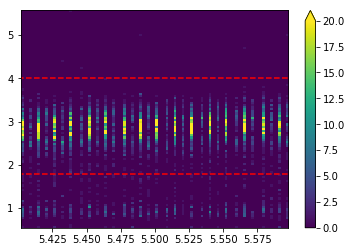

In [144]:
a = data_ana.Slice([5.4,5.6],store,key = 'data_correct')
a.slice([4.0,4.0],[1.8,1.8])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 6445, 1.9187724670218097e-19)


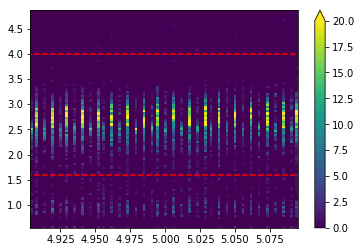

In [147]:
a = data_ana.Slice([4.9,5.1],store,key = 'data_correct')
a.slice([4.0,4.0],[1.6,1.6])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(21451.507535217064, 8310, 1.876641092369321e-19)


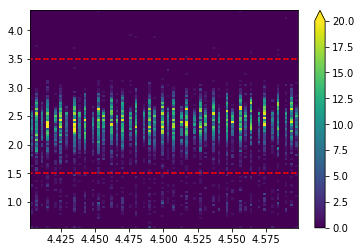

In [150]:
a = data_ana.Slice([4.4,4.6],store,key = 'data_correct')
a.slice([3.5,3.5],[1.5,1.5])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 10323, 1.8106836435145553e-19)


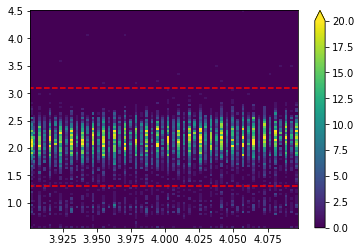

In [153]:
a = data_ana.Slice([3.9,4.1],store,key = 'data_correct')
a.slice([3.1,3.1],[1.3,1.3])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0, 6398, 1.6480756814273226e-19)


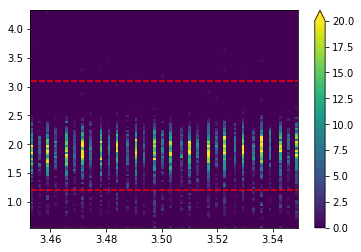

In [155]:
a = data_ana.Slice([3.45,3.55],store,key = 'data_correct')
a.slice([3.1,3.1],[1.2,1.2])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 8127, 1.4491861031673709e-19)


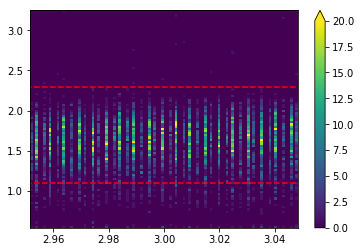

In [158]:
a = data_ana.Slice([2.95,3.05],store,key = 'data_correct')
a.slice([2.3,2.3],[1.1,1.1])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 10224, 1.236840238320633e-19)


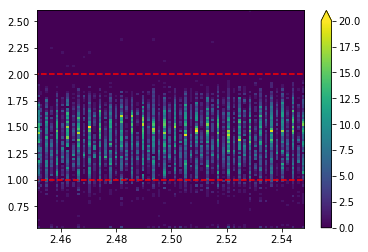

In [161]:
a = data_ana.Slice([2.45,2.55],store,key = 'data_correct')
a.slice([2.0,2.0],[1.0,1.0])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 11118, 8.5512121273748372e-20)


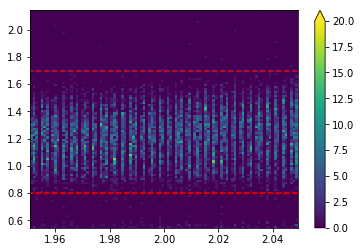

In [164]:
a = data_ana.Slice([1.95,2.05],store,key = 'data_correct')
a.slice([1.7,1.7],[0.8,0.8])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(0.0, 9650, 4.3942502145370238e-20)


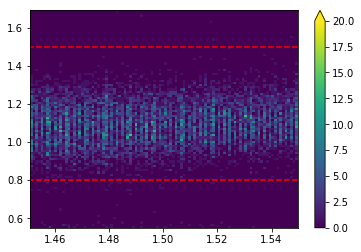

In [167]:
a = data_ana.Slice([1.45,1.55],store,key = 'data_correct')
a.slice([1.5,1.5],[0.8,0.8])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

(114339.41756533933, 5248, 1.1541668962974666e-20)


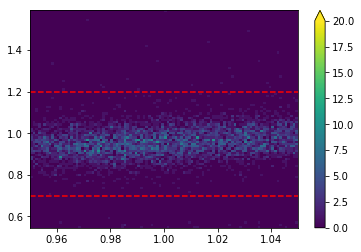

In [170]:
a = data_ana.Slice([0.95,1.05],store,key = 'data_correct')
a.slice([1.2,1.2],[0.7,0.7])
a.calc(n_pulse=n_pulse_all)
df = a.save(df)

In [172]:
df

,en_section,extra,n_en,neutron_numb,p_en,p_numb_exp,p_numb_theory,sensitivity,slice_bottom,slice_top
0,"[18, 20]",,19.00,3.539355e+09,3.383878,3102.0,4682.042279,1.312605e-19,"[2, 1.8]","[7, 6.5]"
1,"[16, 18]",,17.00,4.403320e+09,3.598976,3829.0,6299.651686,1.385115e-19,"[2, 1.8]","[7, 6.5]"
2,"[15.2, 16.8]",,16.00,4.032902e+09,3.798597,3340.0,4030.691849,1.392367e-19,"[2.2, 2]","[7, 6.5]"
3,"[14.2, 15.8]",,15.00,4.380584e+09,3.998172,3852.0,4416.002697,1.556029e-19,"[2.2, 2]","[7, 6.5]"
4,"[13.2, 14.8]",,14.00,5.072912e+09,4.252386,4607.0,5693.591580,1.709210e-19,"[2.5, 2.2]","[7, 6.5]"
5,"[12.5, 13.5]",,13.00,3.639519e+09,4.508023,3425.0,7124.598602,1.877606e-19,"[2.7, 2.4]","[7, 6.5]"
6,"[11.5, 12.5]",,12.00,4.203278e+09,4.688782,4018.0,8404.742824,1.983735e-19,"[2.7, 2.4]","[7, 6.7]"
7,"[10.7, 11.3]",,11.00,3.025994e+09,4.726533,3193.0,0.000000,2.207371e-19,"[3, 2.9]","[7, 6.8]"
8,"[10.2, 10.7]",,10.45,2.840556e+09,4.665553,2871.0,0.000000,2.087059e-19,"[3, 3]","[7, 6.8]"
9,"[9.7, 10.3]",,10.00,3.606990e+09,4.586803,3778.0,0.000000,2.126321e-19,"[3, 3]","[6.3, 6.4]"


In [173]:
df.to_pickle(r'D:\root\ch2_single_new.pkl')

In [174]:
2.2*1.05

2.3100000000000005

In [176]:
store.remove('data_t0')

In [177]:
store.keys()

['/data', '/data_ana', '/data_coin', '/data_correct', '/data_t0_new']

In [178]:
store.remove('/data')

In [179]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: D:\root\single_pulse.h5
/data_ana                frame_table  (typ->appendable,nrows->1196525,ncols->26,indexers->[index],dc->[board_id,signal_len,start_flag_x,detector_type,trigger,fdm_t0_id,tof_time,tof_time_correction,channel,t0_id,signal_len_cumsum,wf_index,t0_len,numb_signal_package,tcm_board_id,start_flag_y,tcm_t0_id,tcm_time,tcm_time_correct,t0_index,file_numb,run_numb,address,peak_amp,peak_time,baseline])                                                                                 
/data_coin               frame_table  (typ->appendable,nrows->18987,ncols->32,indexers->[index],dc->[board_id,signal_len,start_flag_x,detector_type,trigger,fdm_t0_id,tof_time,tof_time_correction,channel,t0_id,signal_len_cumsum,wf_index_x,t0_len,numb_signal_package,tcm_board_id,start_flag_y,tcm_t0_id,tcm_time,tcm_time_correct,t0_index,file_numb,run_numb,address_x,peak_amp_x,peak_time_x,baseline,wf_index_y,peak_amp_y,peak_time_y,address_y,peak_time_di

In [180]:
store.close()

In [181]:
store = pd.HDFStore( r'D:\root\single_pulse.h5')

In [183]:
store.remove('data_ana')

In [184]:
store.close()

In [187]:
store = pd.HDFStore( r'D:\root\single_pulse.h5')

In [189]:
store.items

<bound method HDFStore.items of <class 'pandas.io.pytables.HDFStore'>
File path: D:\root\single_pulse.h5
/data_coin               frame_table  (typ->appendable,nrows->18987,ncols->32,indexers->[index],dc->[board_id,signal_len,start_flag_x,detector_type,trigger,fdm_t0_id,tof_time,tof_time_correction,channel,t0_id,signal_len_cumsum,wf_index_x,t0_len,numb_signal_package,tcm_board_id,start_flag_y,tcm_t0_id,tcm_time,tcm_time_correct,t0_index,file_numb,run_numb,address_x,peak_amp_x,peak_time_x,baseline,wf_index_y,peak_amp_y,peak_time_y,address_y,peak_time_diff,peak_amp_divide])
/data_correct            frame_table  (typ->appendable,nrows->1122260,ncols->28,indexers->[index],dc->[board_id,signal_len,start_flag_x,detector_type,trigger,fdm_t0_id,tof_time,tof_time_correction,channel,t0_id,signal_len_cumsum,wf_index,t0_len,numb_signal_package,tcm_board_id,start_flag_y,tcm_t0_id,tcm_time,tcm_time_correct,t0_index,file_numb,run_numb,address,peak_amp,peak_time,baseline,n_en,p_en])                   